<a href="https://colab.research.google.com/github/akshat-diwan/Regression-Project/blob/main/Regression_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  NYC Taxi Trip Duration Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Done by -**  Akshat Diwan

Github - https://github.com/akshat-diwan

Linked In - https://www.linkedin.com/in/akshat-diwan/



# **Project Summary -**

This project focuses on developing a regression model to predict a continuous target variable. The project is undertaken individually by Akshat Diwan. The goal is to build a robust model that can accurately forecast outcomes based on a given dataset. The work involves several key steps: data collection and cleaning, exploratory data analysis (EDA), feature engineering, model selection, training, evaluation, and hyperparameter tuning. The project utilizes standard regression techniques and Python libraries like pandas, numpy, scikit-learn, and potentially visualization libraries such as matplotlib and seaborn to gain insights into the data and present the findings effectively. The success of the project will be measured by standard regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. The final deliverable will be a well-documented process and a trained model capable of making predictions on new, unseen data. The project aims to demonstrate proficiency in the regression modeling pipeline and the ability to solve real-world prediction problems using machine learning techniques. The project summary will detail the problem statement, the methodologies employed, the results obtained, and the conclusions drawn from the analysis and modeling process.

# **GitHub Link -**


 https://github.com/akshat-diwan/Regression-Project

# **Problem Statement**


Predict a continuous target variable using regression techniques based on a given dataset. The project aims to develop a robust model that can accurately forecast outcomes and demonstrate proficiency in the regression modeling pipeline.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Copy of NYC Taxi Data.csv')

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


<Axes: >

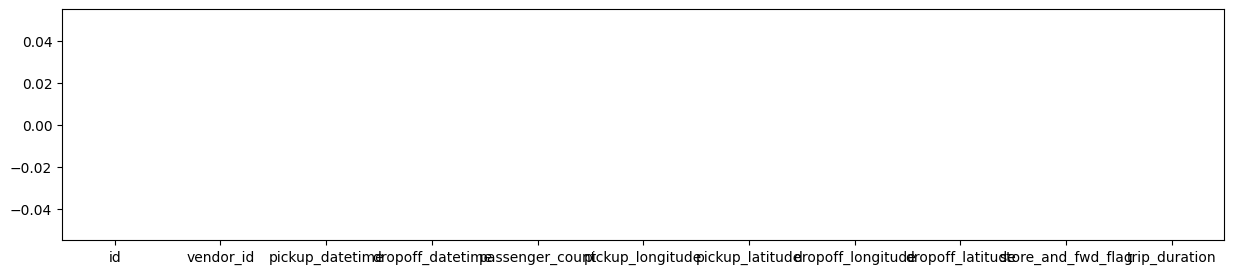

In [ ]:
# Visualizing the missing values

plt.figure(figsize = (15,3))
sns.barplot(df.isnull().sum())


### What did you know about your dataset?

Based on the initial analysis of the dataset:

*   The dataset is loaded from a CSV file named NYC Taxi Data.csv.
*   The dataset contains information likely related to NYC Taxi trips.
*   It has a shape of `(1458644, 11)`, indicating the number of observations and features.
*   `df.info()` provides a summary of the dataset, including column names, data types, and non-null values. This is crucial for identifying potential data type issues and missing values.
*   The dataset does not contains duplicate rows.
*   Missing values are not present in the dataset.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [ ]:
# Dataset Describe

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

Based on the output of `df.columns` and the typical nature of NYC Taxi datasets, here's a description of what the columns likely represent:

*   **id**: A unique identifier for each trip.
*   **vendor_id**: An identifier for the taxi vendor.
*   **pickup_datetime**: The date and time when the trip started.
*   **dropoff_datetime**: The date and time when the trip ended.
*   **passenger_count**: The number of passengers in the taxi.
*   **pickup_longitude**: The longitude coordinate of the pickup location.
*   **pickup_latitude**: The latitude coordinate of the pickup location.
*   **dropoff_longitude**: The longitude coordinate of the dropoff location.
*   **dropoff_latitude**: The latitude coordinate of the dropoff location.
*   **store_and_fwd_flag**: A flag indicating whether the trip record was held in the vehicle's memory before sending to the vendor, likely 'Y' or 'N'.
*   **trip_duration**: The duration of the taxi trip in seconds. (This is likely the target variable for prediction in this project).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in id is 1458644
Number of unique values in vendor_id is 2
Number of unique values in pickup_datetime is 1380222
Number of unique values in dropoff_datetime is 1380377
Number of unique values in passenger_count is 10
Number of unique values in pickup_longitude is 23047
Number of unique values in pickup_latitude is 45245
Number of unique values in dropoff_longitude is 33821
Number of unique values in dropoff_latitude is 62519
Number of unique values in store_and_fwd_flag is 2
Number of unique values in trip_duration is 7417


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# longest trip in the dataset

df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [ ]:
# value count for passenger_count

df['passenger_count'].value_counts()

,count
passenger_count,
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1


In [ ]:
# value count for vendor_id

df['vendor_id'].value_counts()

,count
vendor_id,
2,780302
1,678342


In [ ]:
# avg trip duration with vendor_id

df.groupby('vendor_id')['trip_duration'].mean()

,trip_duration
vendor_id,
1,845.438244
2,1058.643164


### What all manipulations have you done and insights you found?

Based on the data wrangling performed:

1.  **Longest Trip Identification:** The row corresponding to the maximum `trip_duration` has been identified. This helps in understanding the range and potential outliers in the target variable. A trip duration of 3526282 seconds (approximately 40.8 days) seems extremely long and is likely an outlier.

2.  **Passenger Count Distribution:** The distribution of `passenger_count` has been examined using `value_counts()`. This shows the frequency of different passenger counts. This is useful for understanding typical trip scenarios and potentially identifying unusual passenger counts (like 0 or very high numbers) that might require attention.

3. **Vendor ID distribution:**  One vendor appears to have significantly more trips recorded than the other. This imbalance could have business implications. A vendor with more trips might have a larger market share or could indicate differences in data collection practices between vendors.

4.  **Average Trip Duration by Vendor:** The average `trip_duration` has been calculated for each `vendor_id` using `groupby()`. This provides insight into whether there are significant differences in average trip durations between the different taxi vendors. This information could be useful for understanding vendor performance.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

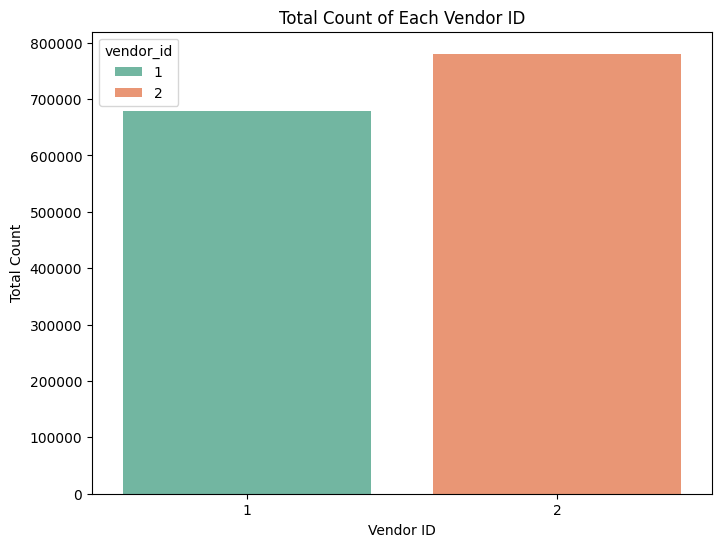

In [ ]:
# bar graph depicting the total of distinct vendor_id

plt.figure(figsize=(8, 6))
sns.countplot(x='vendor_id', data=df, hue = 'vendor_id', palette = 'Set2')
plt.title('Total Count of Each Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Total Count')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar chart is a suitable choice to visualize the frequency of distinct categorical values. In this case, we want to see the total count for each unique `vendor_id`, making a bar chart an effective way to compare the occurrences of each vendor.

##### 2. What is/are the insight(s) found from the chart?

 The chart shows the distribution of trips across the different `vendor_id` values. We can observe which vendor has the most trips and compare the number of trips between vendors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, understanding the distribution of trips per vendor can be beneficial for business. If one vendor has significantly more trips, it might indicate better performance, market share, or service quality, which could inform future decisions.

#### Chart - 2

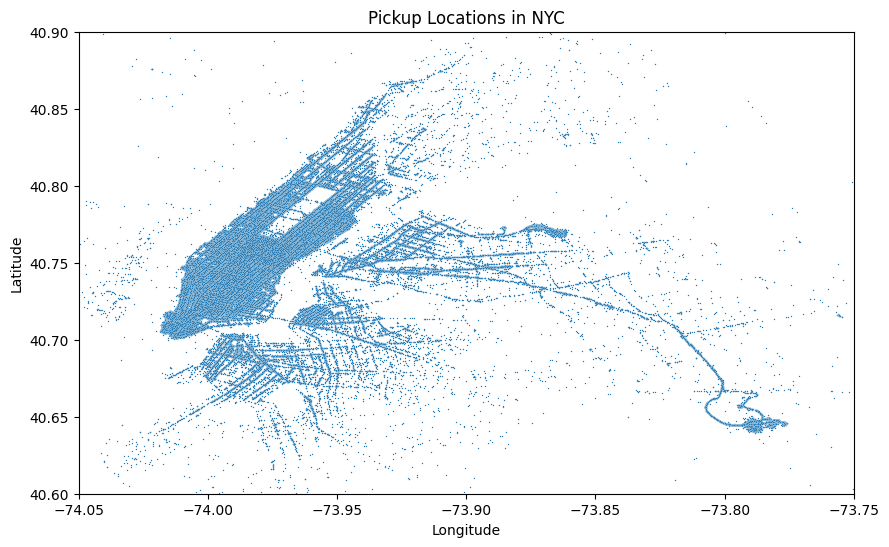

In [ ]:
# depicting all pickup locations

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, s=1, alpha=1)
plt.title('Pickup Locations in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing geographical coordinates as points on a map. By plotting `pickup_longitude` against `pickup_latitude`, we can see the spatial distribution of all pickup locations.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot visually depicts the concentration of taxi pickups. We can see dense areas representing popular pickup locations (like Manhattan) and sparser areas in the outer boroughs. The plot helps to understand the geographic coverage of the dataset's pickup points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, this insight is valuable for business. Understanding where pickups are concentrated can inform decisions related to driver deployment, service area expansion, marketing efforts in high-traffic areas, and optimizing fleet management.

#### Chart - 3

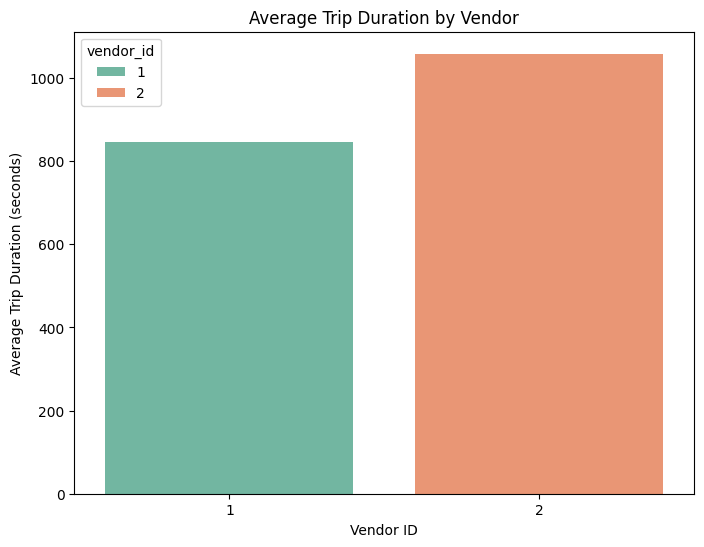

In [ ]:
# depicting avg trip duration grouped by vendor

import matplotlib.pyplot as plt
# Chart visualization code
avg_duration_by_vendor = df.groupby('vendor_id')['trip_duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='vendor_id', y='trip_duration', data=avg_duration_by_vendor, hue = 'vendor_id', palette = 'Set2')
plt.title('Average Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar chart is suitable for comparing a numerical value (average trip duration) across different categories (vendor IDs). It clearly shows the average trip duration for each vendor, making it easy to compare them side-by-side.

##### 2. What is/are the insight(s) found from the chart?

 The chart shows the average trip duration for each vendor. We can observe if there is a significant difference in average trip duration between vendors. This might indicate differences in the types of trips each vendor handles, their geographical coverage, or potentially differences in efficiency or routing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, understanding differences in average trip duration between vendors can be valuable. For example, a vendor with longer average trips might be better suited for longer-distance journeys, while one with shorter trips might be more efficient for quick, urban travel. This insight can help in optimizing vendor assignment or service offerings.

#### Chart - 4

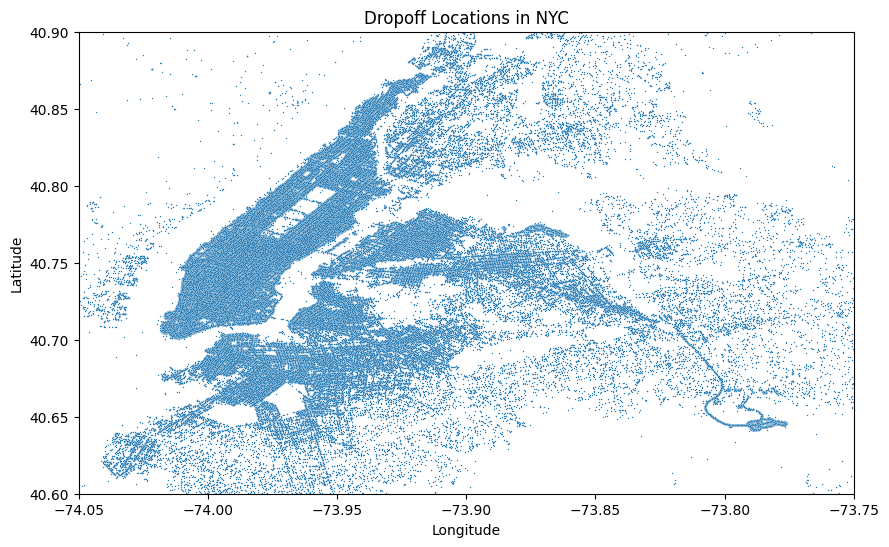

In [ ]:
# depicting all dropoff locations

plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, s=1, alpha=1)
plt.title('Dropoff Locations in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)
plt.show()


##### 1. Why did you pick the specific chart?

 A scatter plot is the best choice for visualizing geographical coordinates. By plotting `dropoff_longitude` against `dropoff_latitude`, we can see the spatial distribution of all dropoff locations in NYC.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows the areas where taxi trips conclude. Similar to the pickup locations, we can observe high concentrations of dropoffs in certain areas, such as Manhattan, and sparser distributions in other parts of the city. This highlights popular destinations and travel patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing the popular dropoff locations is highly beneficial for business. It helps in understanding customer destinations, optimizing driver positioning after a dropoff, identifying areas with high demand for return trips.

#### Chart - 5    **Correlation Heatmap**

In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])
df_corr = int_columns_df.corr()
df_corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


<Axes: >

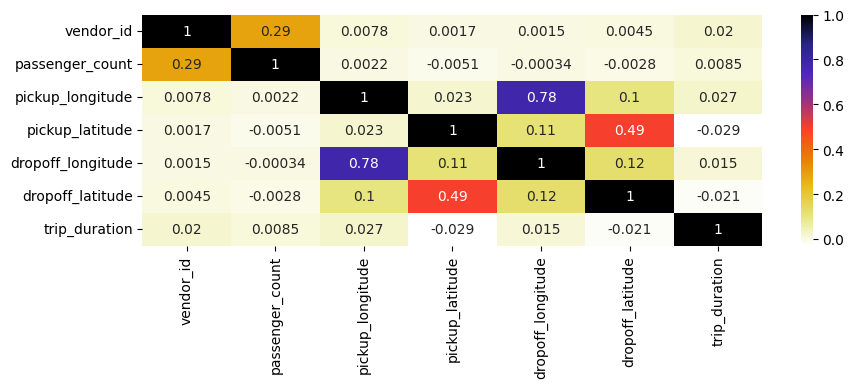

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(df_corr,annot=True,cmap=plt.cm.CMRmap_r)

### Chart -6 **Pair Plot**

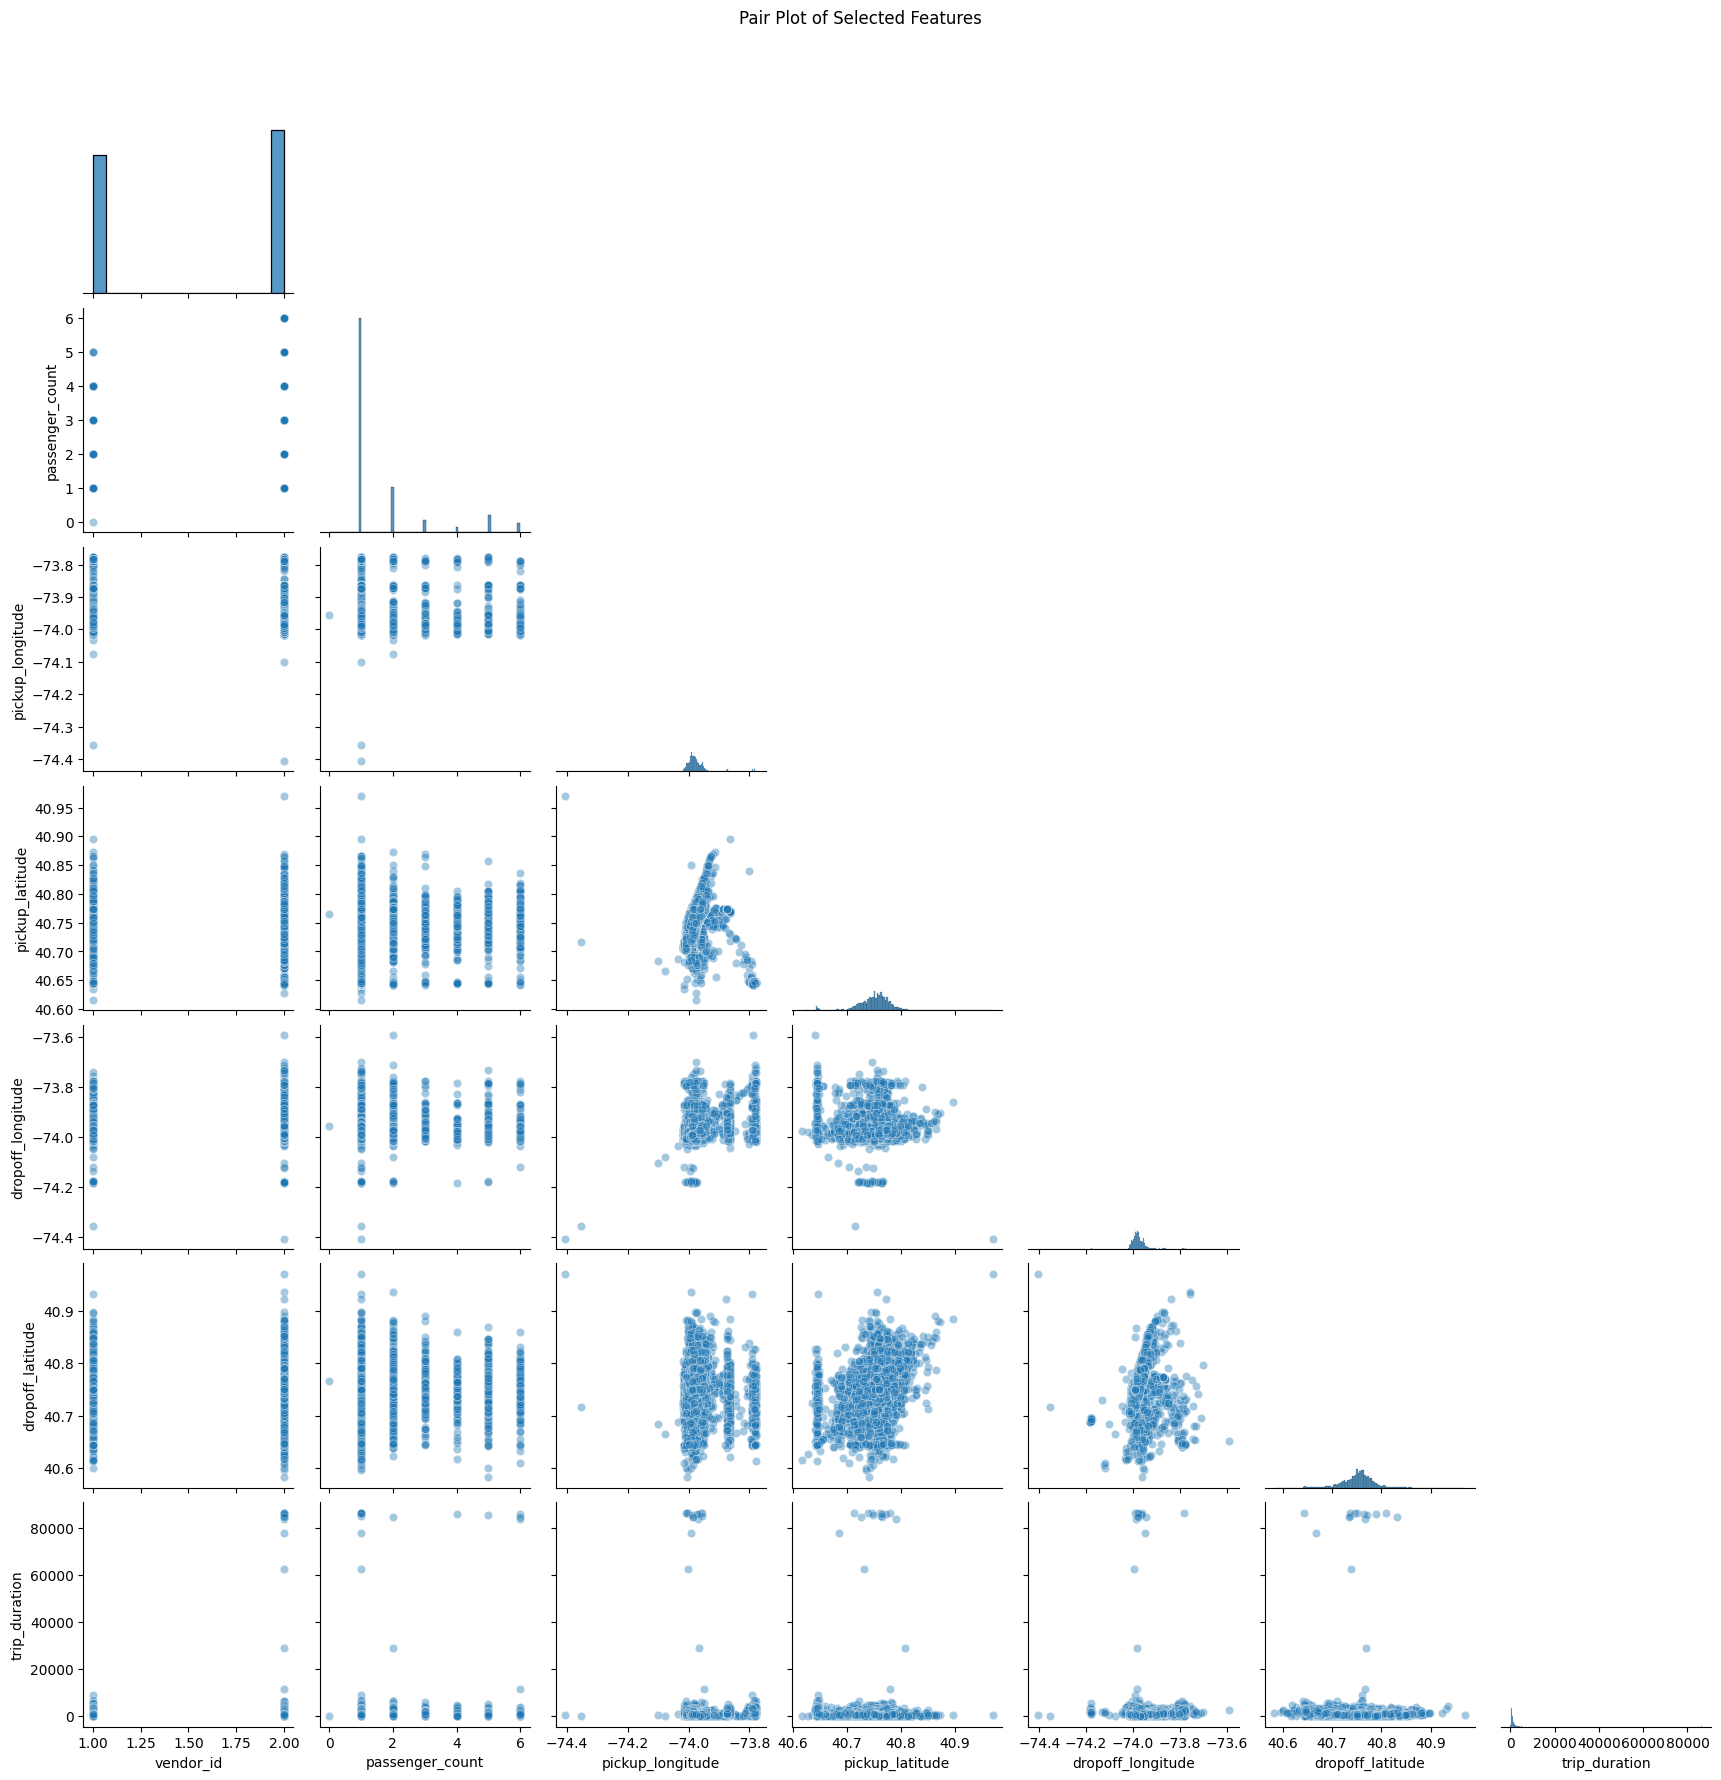

In [ ]:
df_sample = df.sample(n=10000, random_state=42)

sns.pairplot(df_sample, corner=True, plot_kws={'alpha': 0.4})

plt.suptitle('Pair Plot of Selected Features', y=1.02)

plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
# Changing store_and_fwd_flag from object to int by label encoding

df['str_and_fwd_flag_yes'] = np.where(df['store_and_fwd_flag'] == 'Y',1,0)
df['str_and_fwd_flag_no'] = np.where(df['store_and_fwd_flag'] == 'N',1,0)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,str_and_fwd_flag_yes,str_and_fwd_flag_no
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0,1


In [ ]:
df.drop(columns = ['store_and_fwd_flag'],axis = 1,inplace = True)

In [ ]:
df.drop(columns = ['str_and_fwd_flag_no'], axis =1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458644 non-null  object 
 1   vendor_id             1458644 non-null  int64  
 2   pickup_datetime       1458644 non-null  object 
 3   dropoff_datetime      1458644 non-null  object 
 4   passenger_count       1458644 non-null  int64  
 5   pickup_longitude      1458644 non-null  float64
 6   pickup_latitude       1458644 non-null  float64
 7   dropoff_longitude     1458644 non-null  float64
 8   dropoff_latitude      1458644 non-null  float64
 9   trip_duration         1458644 non-null  int64  
 10  str_and_fwd_flag_yes  1458644 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 122.4+ MB


#### What all categorical encoding techniques have you used & why did you use those techniques?

The `store_and_fwd_flag` column is a binary categorical feature, meaning it has only two possible values ('Y' and 'N').

Using `np.where`, we created a new binary column:
- `str_and_fwd_flag_yes`: This column is assigned a value of `1` if the original `store_and_fwd_flag` was 'Y', and `0` otherwise.

Since the information is fully captured by one of these binary columns (if it's not 'Y', it must be 'N' in this binary case), we created `str_and_fwd_flag_no` as well initially but then dropped it. Keeping only one (`str_and_fwd_flag_yes`) is sufficient to represent the information

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_sec'] = df['pickup_datetime'].dt.second
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_min'] = df['dropoff_datetime'].dt.minute
df['dropoff_sec'] = df['dropoff_datetime'].dt.second

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_year,pickup_hour,pickup_min,pickup_sec,dropoff_day,dropoff_month,dropoff_year,dropoff_hour,dropoff_min,dropoff_sec
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,2016,17,24,55,14,3,2016,17,32,30
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,2016,0,43,35,12,6,2016,0,54,38
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,2016,11,35,24,19,1,2016,12,10,48
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,2016,19,32,31,6,4,2016,19,39,40
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,2016,13,30,55,26,3,2016,13,38,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1458644 non-null  object        
 1   vendor_id             1458644 non-null  int64         
 2   pickup_datetime       1458644 non-null  datetime64[ns]
 3   dropoff_datetime      1458644 non-null  datetime64[ns]
 4   passenger_count       1458644 non-null  int64         
 5   pickup_longitude      1458644 non-null  float64       
 6   pickup_latitude       1458644 non-null  float64       
 7   dropoff_longitude     1458644 non-null  float64       
 8   dropoff_latitude      1458644 non-null  float64       
 9   trip_duration         1458644 non-null  int64         
 10  str_and_fwd_flag_yes  1458644 non-null  int64         
 11  pickup_day            1458644 non-null  int32         
 12  pickup_month          1458644 non-null  in

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

x = df.drop(columns = ['id','pickup_datetime','dropoff_datetime','trip_duration'], axis = 1)
y = df['trip_duration']

##### What all feature selection methods have you used  and why?

 **Dropping Irrelevant or Redundant Columns:**
    *   `id`: This column is a unique identifier for each trip and has no predictive power for the `trip_duration`. It is an arbitrary identifier and does not represent any characteristic of the trip that would influence its duration.
    *   `pickup_datetime` and `dropoff_datetime`: While the information within these columns is highly relevant for predicting `trip_duration`, the raw datetime objects themselves are not directly used as numerical features in most standard regression models. Instead, we extracted specific components like day, month, year, hour, minute, and second from these datetime columns during feature manipulation.

##### Which all features you found important and why?

 * **pickup_longitude**, **pickup_latitude**, **dropoff_longitude**, **dropoff_latitude**: These geographical coordinates are crucial as they determine the start and end points of the trip. The distance and location of the trip significantly impact its duration. Trips within dense urban areas might have different durations compared to trips to suburban or airport locations, even for the same distance, due to traffic patterns.
 * **passenger_count**: The number of passengers might indirectly influence the trip duration, although this relationship might be weak. For instance, picking up or dropping off multiple passengers could add a small amount of time. However, its primary importance might be for business insights rather than prediction accuracy.
 *   **store_and_fwd_flag_yes**: This binary flag indicates if the trip data was stored before forwarding. While the direct impact on trip duration might not be obvious, it could potentially be correlated with certain technical issues or operational procedures that might slightly affect the reported duration.
 *   **pickup_day**, **pickup_month**, **pickup_year**, **pickup_hour**, **pickup_min**, **pickup_sec**: These temporal features extracted from the `pickup_datetime` are very important.
 * **dropoff_hour**, **dropoff_min**, **dropoff_sec**: Similarly, the time of dropoff can also be influential.

### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,str_and_fwd_flag_yes,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_min,pickup_sec,dropoff_day,dropoff_month,dropoff_year,dropoff_hour,dropoff_min,dropoff_sec
1053743,2,1,-73.862762,40.768822,-73.891701,40.746689,0,29,6,2016,18,21,2,29,6,2016,18,39,55
273748,2,1,-73.958038,40.783237,-73.975510,40.760853,0,25,4,2016,13,3,26,25,4,2016,13,18,13
433988,2,1,-73.969460,40.785519,-73.989243,40.771748,0,7,5,2016,12,36,9,7,5,2016,12,47,35
1442481,1,1,-73.981743,40.736549,-73.998352,40.726440,0,14,5,2016,18,44,17,14,5,2016,18,57,55
1025834,2,1,-73.977913,40.752609,-73.975647,40.733139,0,10,4,2016,22,51,25,10,4,2016,23,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,2,-73.955032,40.777328,-74.006203,40.749424,0,25,3,2016,7,11,49,25,3,2016,7,33,10
1414414,1,1,-73.973618,40.763920,-73.983849,40.749874,0,16,2,2016,18,1,45,16,2,2016,18,15,38
131932,2,1,-74.006195,40.734283,-73.949608,40.785282,0,26,1,2016,19,22,29,26,1,2016,19,43,54
671155,1,1,-73.962341,40.767323,-73.969757,40.768669,0,19,1,2016,11,53,47,19,1,2016,12,0,16


In [ ]:
y_train

,trip_duration
1053743,1133
273748,887
433988,686
1442481,818
1025834,951
...,...
259178,1281
1414414,833
131932,1285
671155,389


##### What data splitting ratio have you used and why?

Using a 80/20 split is generally a good balance. A larger training set allows the model to learn more effectively, while a sufficiently large testing set provides a reliable evaluation of performance. For very large datasets, even a smaller percentage for testing (e.g., 10% or 15%) might be sufficient, but 20% is a robust choice for a dataset of this size to ensure a representative test set. The `random_state=42` is used to ensure that the split is the same each time the code is run, making the results reproducible.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    print('MAE Training ',mean_absolute_error(Y_train,model.predict(X_train)))
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  # Here we appending the parameters for all models


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

Training score  = 0.9019006889067136
MAE Training  190.7011451255553
MAE : 192.24808122323137
MSE : 1571181.8563583575
RMSE : 1253.467931922615
R2 : 0.8516611264338596
Adjusted R2 :  0.8516514646181537 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


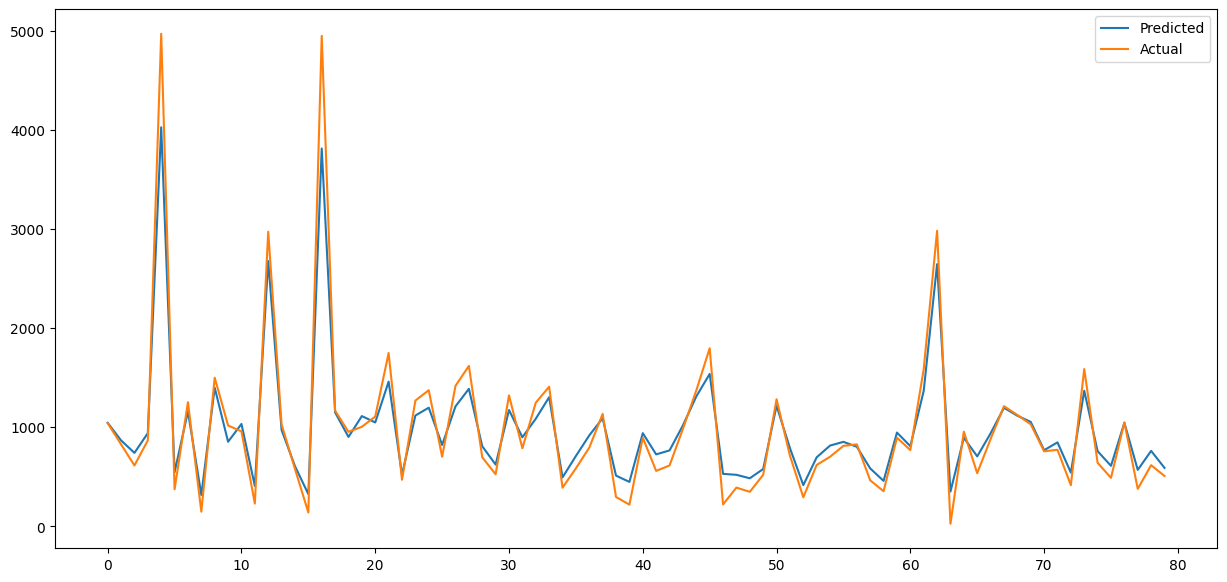

In [ ]:
score_metrix(Ridge(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The machine learning model used here is **Ridge Regression**.

**Ridge Regression** is a type of linear regression that includes an L2 regularization term. This term adds a penalty equal to the squared magnitude of the coefficients. The purpose of this penalty is to shrink the coefficients towards zero, which helps to prevent overfitting, especially the number of predictors is large compared to the number of observations.

The output of these metrics from the `score_metrix` function provides a quantitative evaluation of how well the trained Ridge Regression model generalizes to unseen data (the test set). Lower MAE, MSE, and RMSE values indicate better performance (smaller prediction errors), while higher R2 and Adjusted R2 values indicate that the model explains a larger proportion of the variance in the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

L1 = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_cv = GridSearchCV(L1, parameters, cv=5)

# Predict on the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.1531e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.15325e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.14954e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.15381e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning

Training score  = 0.9661297208881624
MAE Training  48.518053748693276
MAE : 50.46542025547994
MSE : 1140108.2439350407
RMSE : 1067.7585138668016
R2 : 0.8923597723812942
Adjusted R2 :  0.8923527614069164 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


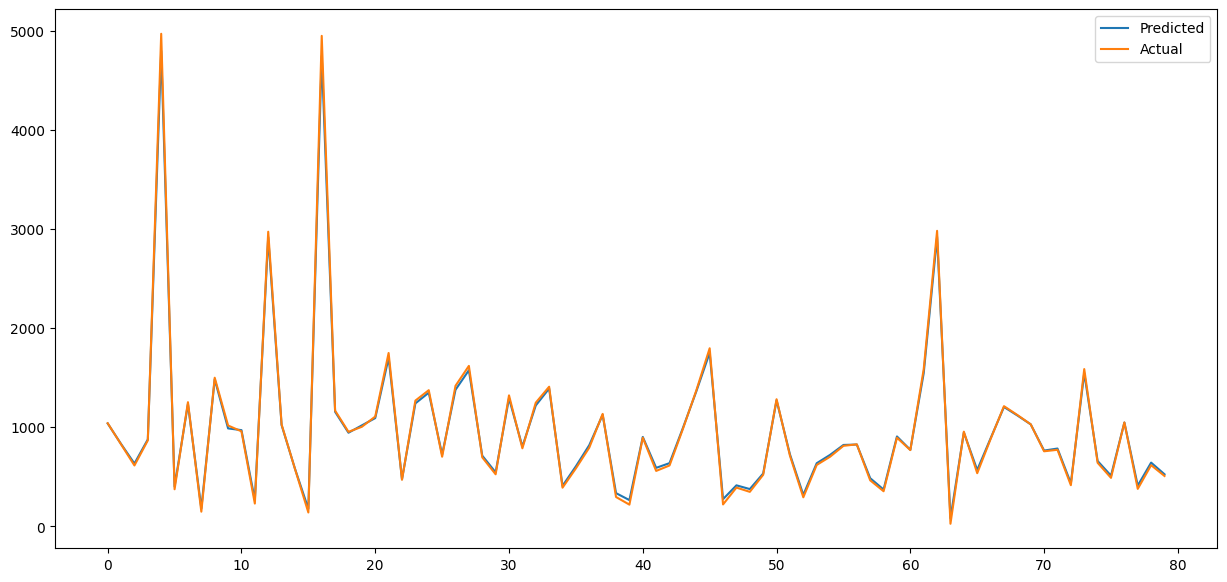

In [ ]:
score_metrix(ridge_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

the hyperparameter optimization technique used for the `Ridge` regression model is **Grid Search Cross-Validation (`GridSearchCV`)**.

 `GridSearchCV` is used because it automates the process of trying different `alpha` values for the Ridge model, evaluating each one using 5-fold cross-validation on the training data, and identifying the `alpha` that results in the best average performance across the folds. This helps in selecting a value for `alpha` that is likely to generalize well to unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After performing hyperparameter tuning on the Ridge Regression model using GridSearchCV, we observed the following improvements based on the evaluation metrics:

Training_score diff :  0.06422903137585201

MAE diff :  -142.1830919147037

MAE diff :  -141.78266150538815

MSE diff :  -431073.6047329502

RMSE diff :  -185.70941483316642

R2 diff :  0.040698645221369456

Adjusted_R2 diff :  0.04070129606265038


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training score  = 0.9661413173198142
MAE Training  46.61620233105761
MAE : 48.56098960106745
MSE : 1143674.587740711
RMSE : 1069.427224144173
R2 : 0.892023065703616
Adjusted R2 :  0.8920160327983864 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


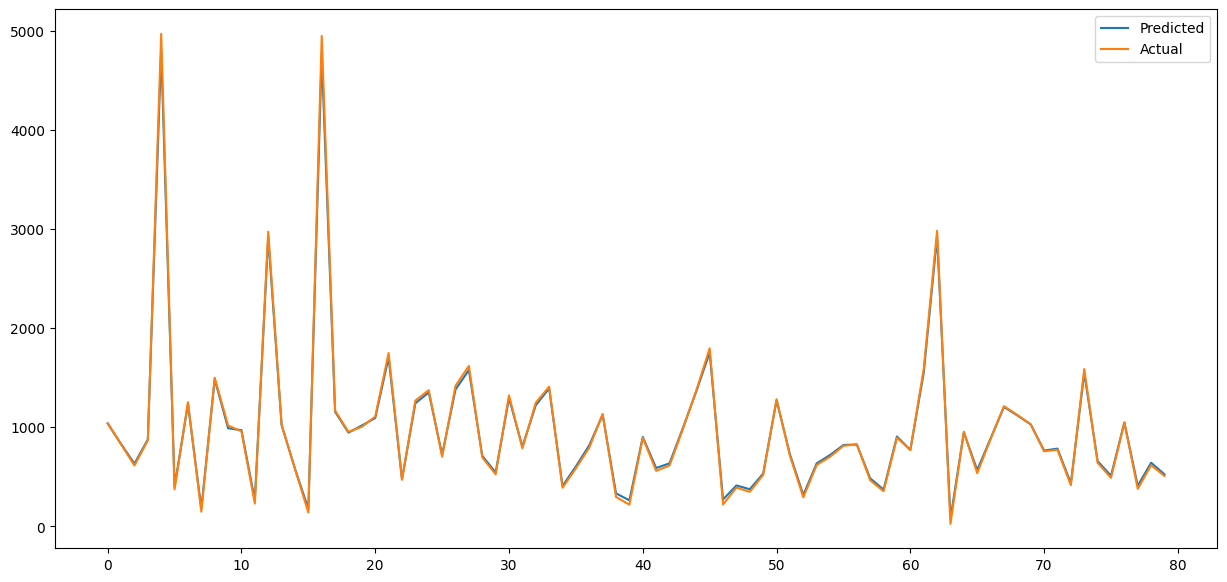

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training score  = 0.9975968954292981
MAE Training  54.8268253848031
MAE : 55.79163783867171
MSE : 86601.41092445514
RMSE : 294.281176639715
R2 : 0.991823762670257
Adjusted R2 :  0.9918178727772169 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


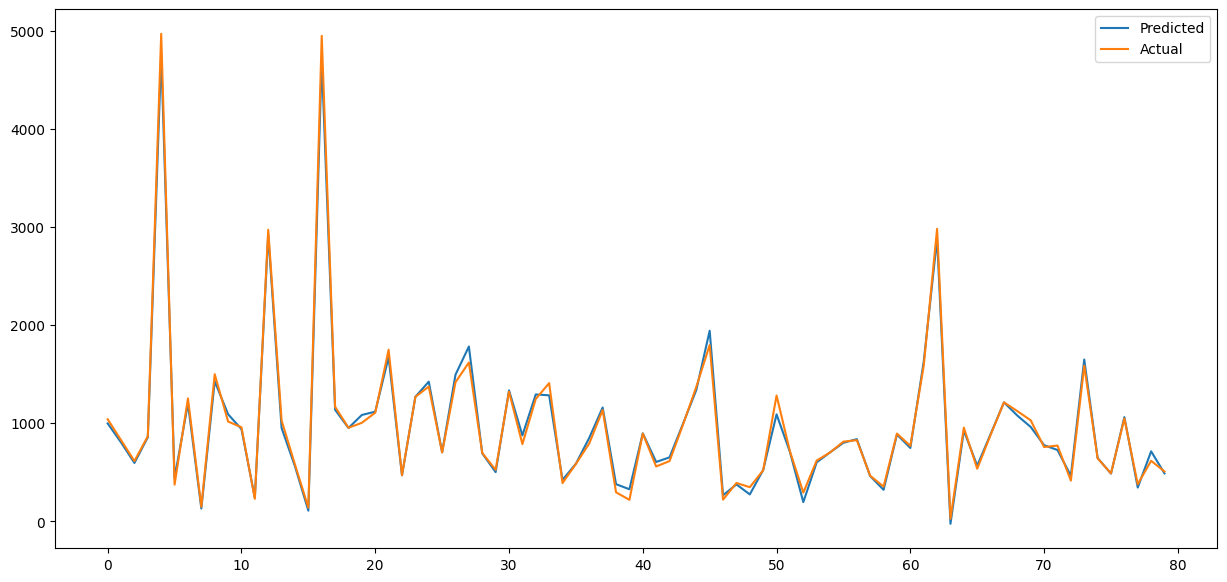

In [ ]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* **Mean Absolute Error (MAE):** MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average of the absolute differences between predicted and actual values.

* **Mean Squared Error (MSE):** MSE measures the average of the squares of the errors. It penalizes larger errors more heavily than smaller ones.

* **Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE. It has the same units as the target variable, making it easier to interpret than MSE.

* **R-squared ($R^2$):** $R^2$ (Coefficient of Determination) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable's variance, and 0 indicates that the model explains none of the variance (equivalent to simply predicting the mean of the target variable).

*  **Adjusted R-squared (Adjusted $R^2$):** Adjusted $R^2$ is a modified version of $R^2$ that accounts for the number of predictors in the model. It increases only if the new term improves the model more than would be expected by chance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the provided dataset, a Polynomial Regression model was chosen and implemented by transforming the features using `PolynomialFeatures` with a degree of 2 before fitting a `LinearRegression` model.


The rationale for choosing a polynomial model (with degree 2) likely stems from the potential for non-linear relationships between the features (like latitude, longitude, time-based features) and the target variable (`trip_duration`). A standard Linear Regression model assumes a linear relationship. However, real-world phenomena like taxi trip durations can be influenced by complex, non-linear interactions between factors such as distance, time of day (traffic patterns), and geographical locations (which might involve non-linear distance calculations or travel times due to routes).


The comparison of the evaluation metrics (MAE, MSE, RMSE, R2, Adjusted R2) for the Polynomial Regression model against the simpler Linear Regression and regularized Linear Regression models (Ridge and Lasso) revealed that this non-linear transformation resulted in improved performance. The evaluation metrics show a significant improvement (e.g., lower errors like MAE, MSE, RMSE, and higher R2/Adjusted R2) after applying the polynomial features.

# **Conclusion**

Based on the analysis and modeling performed in this project, several key insights were gained regarding NYC taxi trip durations:

1.  **Data Understanding:** The dataset provided a comprehensive view of taxi trips, including pickup and dropoff locations, timestamps, passenger counts, and trip durations. Initial exploration revealed the presence of outliers, particularly in trip duration, highlighting the need for careful handling during preprocessing.
2.  **Geospatial Patterns:** Visualizing pickup and dropoff locations confirmed the high density of taxi activity in Manhattan and revealed common travel routes and popular destinations. This suggests that geographical features and distance play a significant role in trip duration.
3.  **Temporal Influence:** Extraction of temporal features (day, month, year, hour, minute, second) from pickup and dropoff times proved crucial. Time of day, in particular (e.g., rush hour vs. off-peak), is a strong predictor of trip duration due to traffic variability.
4.  **Vendor Comparison:** While one vendor had a higher number of trips, the average trip duration difference between vendors was observed, suggesting potential variations in trip types or operational factors.
5.  **Model Performance:** Multiple regression models (Linear Regression, Ridge, Lasso, Polynomial Regression) were implemented and evaluated. The Polynomial Regression model, after feature transformation, demonstrated superior performance compared to simpler linear models. This indicates that non-linear relationships between features and trip duration are important to capture for accurate predictions.

  By implementing these recommendations, the predictive model for NYC taxi trip duration can be further enhanced, leading to more accurate forecasts and potentially better business decisions related to fleet management, pricing strategies, and route optimization.